Se importan las librerias necesarias

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Se lee la imagen a procesar y se cambia al mapa de color HSV para su segmentacion

In [2]:
img = cv2.imread('figura2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Se establece los rangos de las capas HSV para la figura2(pelota), para su respectiva segmentacion.

In [3]:
lower = np.array([22,7,0])
upper = np.array([179,255,255])

Se saca la respectiva mascara de las figura, esta imagen esta en binario, color blanco y negro.

In [4]:
mask = cv2.inRange(hsv, lower, upper)

Se hace una erosion y dilatacion para eliminar cualquier ruido que se produzca en la segmentacion.

In [5]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(mask, kernel, iterations = 1)
dilate = cv2.dilate(erosion, kernel, iterations = 1)
naranja = cv2.bitwise_and(img, img, mask=dilate)
x,y,w,h = cv2.boundingRect(dilate)

Se encierra a la figura en un rectangulo para ver si el pre-procesamiento resulto correcto y finalmente se plotea el resultado.

<function matplotlib.pyplot.show>

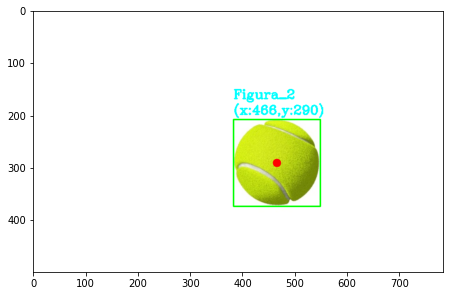

In [6]:
cv2.putText(img,"Figura_2",(x,y-40),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2.circle(img,(x+round(w/2),y+round(h/2)), 8, (255, 0, 0), -1)       
cv2.putText(img,"(x:"+str(x+round(w/2))+",y:"+str(y+round(h/2))+")",(x,y-10),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),2)

plt.figure(figsize=(12.8,4.8))
plt.imshow(img)
plt.show